In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

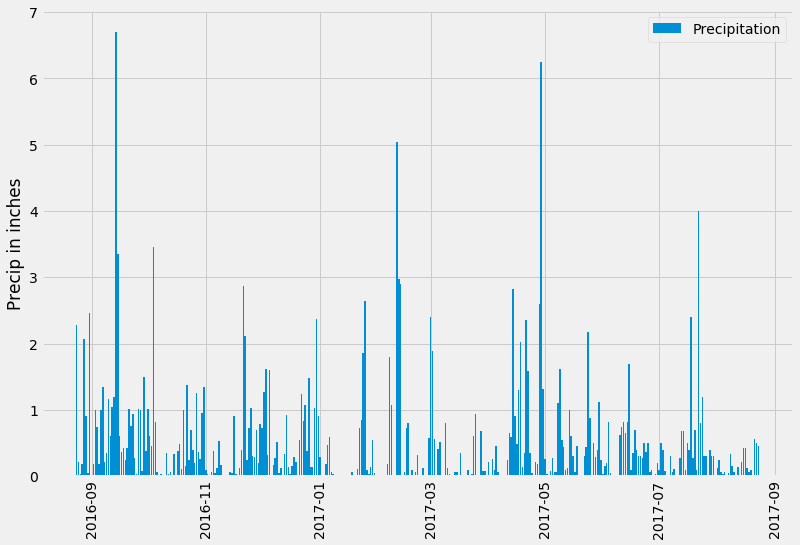

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# get Latest Date
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()


# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago


# Perform a query to retrieve the data and precipitation scores

one_year =session.query(measurement.date,measurement.prcp).\
    filter(measurement.date > year_ago).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
query = pd.DataFrame(one_year)
query.set_index('date',inplace=False)
query.head()


# Sort the dataframe by date
query.sort_values('date', inplace = True)
query

# Use Pandas Plotting with Matplotlib to plot the data
x = query['date'].astype('datetime64[ns]')
y = query['prcp']

plt.figure(figsize=(12,8))
plt.bar(x,y, label = 'Precipitation')

plt.ylabel('Precip in inches')
plt.legend(loc ='upper right')
plt.xticks(rotation = 90)

plt.show()



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

summary = query.describe()
summary

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
mean=query.prcp.mean()
median=query.prcp.mode()
mode=query.prcp.median()

print(f"The average rain in Hawaii for these dates is {mean}")
print(f"The median rain value in Hawaii for these dates is {median}")
print(f"The most common rainfall amount in Hawaii for these dates is {mode}")

The average rain in Hawaii for these dates is 0.1764615384615378
The median rain value in Hawaii for these dates is 0    0.0
dtype: float64
The most common rainfall amount in Hawaii for these dates is 0.02


In [14]:
# Design a query to show how many stations are available in this dataset?
# engine.execute('SELECT distinct(count(name)) FROM station').fetchall()
engine.execute('SELECT distinct(station) FROM measurement').fetchall()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active                                                         

   
    


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
station = session.query(measurement.station, measurement.prcp).group_by()

active_station = pd.DataFrame(station)


active_station.head()

,station,prcp
0,USC00519397,0.08
1,USC00519397,0.00
2,USC00519397,0.00
3,USC00519397,0.00
4,USC00519397,NaN


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

most_active= active[0][0] 
most_active

lowest = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == most_active).all()

highest = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == most_active).all()

mean = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == most_active).all()

print(f"The lowest temperature recorded is {lowest}")
print(f"The averagetemperature recorded is {mean}")
print(f"The highest temperature recorded is{highest}")

The lowest temperature recorded is [(54.0,)]
The averagetemperature recorded is [(71.66378066378067,)]
The highest temperature recorded is[(85.0,)]


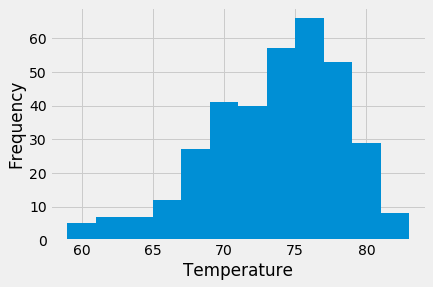

In [18]:
# Choose the station with the highest number of temperature observations.


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

hist_data =session.query(measurement.tobs).\
    filter(measurement.date >= year_ago).\
    filter(measurement.station == most_active).all()



temps = pd.DataFrame(hist_data)
temps.head()

label = 'tobs'
plt.hist(temps['tobs'], bins = 12, label = label)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend
plt.show()

## Bonus Challenge Assignment

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# def calc_temps(start_date, end_date):
#     """TMIN, TAVG, and TMAX for a list of dates.
    
#     Args:
#         start_date (string): A date string in the format %Y-%m-%d
#         end_date (string): A date string in the format %Y-%m-%d
        
#     Returns:
#         TMIN, TAVE, and TMAX
#     """
    
#     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# # function usage example
# print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
